# Рынок заведений общественного питания Москвы
На основе открытых данных необходимо подготовить исследование рынка заведений общественного питания Москвы для инвесторов.

**Ход исследования:**

Данные о заведениях общественного питания мы получим из файла 'rest_data.csv' 

О качестве данных ничего не известно. Поэтому перед проведением исследовательского анализа нам понадобится сделать их обзор. Мы проверим данные на ошибки и затем на этапе предобработки исправим критичные ошибки.

Таким образом, исследование пройдет в несколько этапов:

1. Изучение данных.
2. Предобработка данных.
3. Исследовательский анализ данных.

## Обзор данных <a id="start"></a> 

### Получение общей информации о данных <a id="preprocessing"></a> 

Загрузим данные о заведениях общественного питания Москвы. Убедимся, что тип данных в каждой колонке правильный, а также отсутствуют пропущенные значения и дубликаты. 

Путь к файлу:

 *    rest_data.csv

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from io import BytesIO
import requests 

In [2]:
# функция для первичного анализа датасета
def primary_analysis (data):
    display(data.head(5))
    display(data.info())
    display(data.describe())

data = pd.read_csv('rest_data.csv')
primary_analysis(data)

print('\nКоличество уникальных значений в столбцах:')
print(data.nunique())

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000



Количество уникальных значений в столбцах:
id             15366
object_name    10393
chain              2
object_type        9
address         9108
number           315
dtype: int64


Описание столбцов согласно документации к данным:
* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

In [3]:
# переведем названия заведений в нижний регистр
data['object_name'] = data['object_name'].str.lower()
display(data['object_name'].head(5))

print("Количество явных дубликатов:", data.duplicated().sum())

0                   сметана
1                    родник
2           кафе «академия»
3                пиццетория
4    кафе «вишневая метель»
Name: object_name, dtype: object

Количество явных дубликатов: 0


В датасете тип данных в каждом столбце соответствует описанию, пропущенные значения и явные дубликаты отсутствуют. 

Теперь проверим данные на наличие неявных дубликатов:

In [4]:
# найдем количество уникальных названий заведений
print('Количество уникльных названий заведений:', data['object_name'].nunique())

# уникальные названия заведений
data_tmp = data.pivot_table(index=['object_name'], values=['id'],aggfunc=['count']).reset_index()
data_tmp.columns = ['object_name', 'count']
data_tmp = data_tmp.sort_values(by='count', ascending=False)
data_tmp['share'] = data_tmp['count'] / len(data_tmp)
print('Уникальные названия заведений:')
display(data_tmp.head(10).style.format({'share': '{:,.2%}'.format}))

Количество уникльных названий заведений: 9924
Уникальные названия заведений:


,object_name,count,share
7639,столовая,321,3.23%
3468,кафе,278,2.80%
9463,шаурма,250,2.52%
9798,шоколадница,158,1.59%
623,kfc,155,1.56%
5439,макдоналдс,151,1.52%
1955,бургер кинг,137,1.38%
8792,теремок,94,0.95%
5150,крошка картошка,90,0.91%
2982,домино'с пицца,90,0.91%


Имеем 9924 уникальных названия заведения; наиболее результативный способ анализа на наличие неявных дубликатов - ручная проверка, однако она займет очень много времени. 
Применим другой подход для выявления неявных дубликатов:

In [5]:
print("Количество дубликатов в наборе {'название' + 'адрес'}:", data[['object_name', 'address']].duplicated().sum())
data = data[~data[['object_name', 'address']].duplicated()]
print("Количество дубликатов в наборе {'название' + 'адрес'}:", data[['object_name', 'address']].duplicated().sum())
data.info()

Количество дубликатов в наборе {'название' + 'адрес'}: 225
Количество дубликатов в наборе {'название' + 'адрес'}: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15141 entries, 0 to 15364
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15141 non-null  int64 
 1   object_name  15141 non-null  object
 2   chain        15141 non-null  object
 3   object_type  15141 non-null  object
 4   address      15141 non-null  object
 5   number       15141 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 828.0+ KB


**Вывод**: данные готовы для исследовательского анализа.

## Исследовательский анализ данных <a id="analysis"></a> 
### Соотношение видов объектов общественного питания по количеству <a id="species_ratio"></a> 

Найдем соотношение видов объектов общественного питания Москвы по количеству:

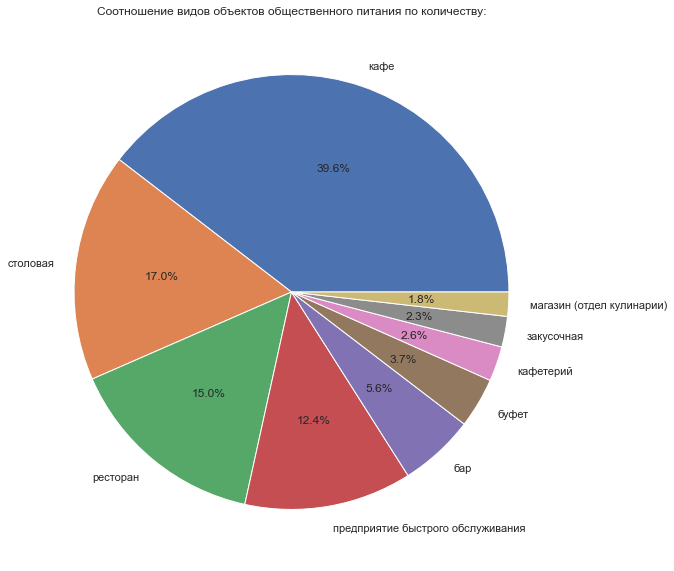

In [6]:
# общее количество объектов
total_objects = data['object_type'].count()

# сводная таблица с количеством объектов с группировкой по виду
objects_type_ratio = data.pivot_table(index='object_type', values='id', aggfunc=['count']).reset_index()
objects_type_ratio.columns = ['object_type', 'count']
objects_type_ratio = objects_type_ratio.sort_values(by='count', ascending=False)

# доля каждого вида от общего количества
objects_type_ratio['ratio'] = objects_type_ratio['count'] / total_objects
#display(objects_type_ratio.style.format({'ratio': '{:,.2%}'.format}))

sns.set(rc={'figure.figsize':(10, 10)})
plt.pie(objects_type_ratio['ratio'], labels = objects_type_ratio['object_type'], autopct='%.1f%%') 
plt.title('Соотношение видов объектов общественного питания по количеству:');
plt.show()

Вывод: наиболее распространенные виды объектов общественного питания в Москве "кафе" (39.6%), "столовая" (17.0%), "ресторан" (15.0%).

### Соотношение сетевых и несетевых заведений по количеству <a id="species_ratio"></a> 

Теперь посчитаем соотношение  сетевых и несетевых заведений по количеству:

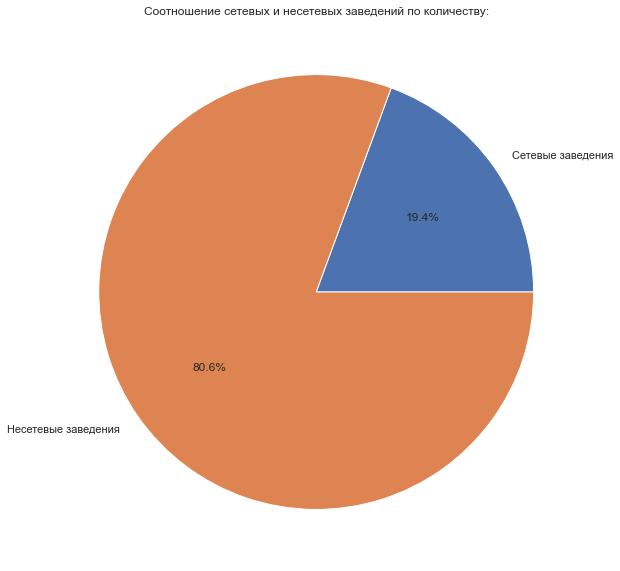

In [7]:
# сводная таблица с количеством объектов с группировкой по типу объекта "сетеевой" / "несетевой"
objects_chain_ratio = data.pivot_table(index='chain', values='id', aggfunc=['count']).reset_index()
objects_chain_ratio.columns = ['object_type', 'count']
objects_chain_ratio['object_type'] = objects_chain_ratio['object_type'].str.replace('да','Сетевые заведения')
objects_chain_ratio['object_type'] = objects_chain_ratio['object_type'].str.replace('нет','Несетевые заведения')

# доля каждого вида от общего количества
objects_chain_ratio['ratio'] = objects_chain_ratio['count'] / total_objects
#display(objects_chain_ratio.style.format({'ratio': '{:,.2%}'.format}))

sns.set(rc={'figure.figsize':(10, 10)})
plt.pie(objects_chain_ratio['ratio'], labels = objects_chain_ratio['object_type'], autopct='%.1f%%') 
plt.title('Соотношение сетевых и несетевых заведений по количеству:');
plt.show()

Вывод: график показывает, что несетевых заведений в Москве в 4 раза больше, чем сетевых (80.6% против 19.4% от общего количества заведений).

### Вид объекта общественного питания, для которого характерно сетевое распространение <a id="object_type"></a> 

Определим вид объекта общественного питания, для которого характерно сетевое распространение:

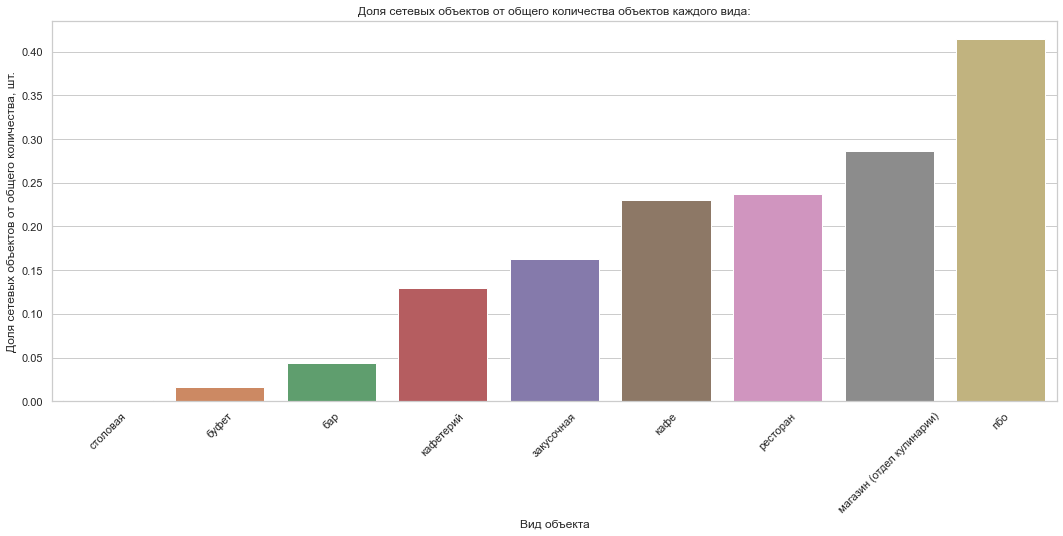

In [8]:
tmp = data.query('chain=="да"').pivot_table(index=['object_type'], values='id', aggfunc=['count']).reset_index()

tmp.columns = ['object_type', 'count']
tmp = tmp.merge(objects_type_ratio, on=['object_type'], how='inner')
tmp['ratio'] = tmp['count_x'] / tmp['count_y']

tmp['object_type'] = tmp['object_type'].str.replace('предприятие быстрого обслуживания','пбо')
tmp = tmp.sort_values(by='ratio')

sns.set(rc={'figure.figsize':(18, 7)})
#sns.set_style('ticks')
sns.set_style('whitegrid')
sns.barplot(x='object_type', y='ratio', data=tmp)

plt.ylabel('Доля сетевых объектов от общего количества, шт.')
plt.xlabel('Вид объекта')
plt.title('Доля сетевых объектов от общего количества объектов каждого вида:')
plt.xticks(rotation = 45)
plt.show();

Вывод: сетевое распространение характерно, в первую очередь, для предприятий быстрого обслуживания.

### Характерные особенности сетевых заведений <a id="features"></a>

Определим, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [9]:
# сводная таблица с количеством сетевых заведений для каждой сети
chain_objects = data.query('chain=="да"').pivot_table(index=['object_name'], values='id', aggfunc=['count']).reset_index()
chain_objects.columns = ['object_name', 'total_objects']
chain_objects = chain_objects.sort_values(by='total_objects', ascending=False)

# добавим в датасет для каждого заведения столбец с общим количеством объектов в сети
data = data.merge(chain_objects, on=['object_name'], how='left')
data = data.fillna(0) # для несетвых объектов количество объектов в сети равно 0
data['total_objects'] = data['total_objects'].astype('int')
display(data.head(5))

,id,object_name,chain,object_type,address,number,total_objects
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,0
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,0
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,0
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,2
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,0


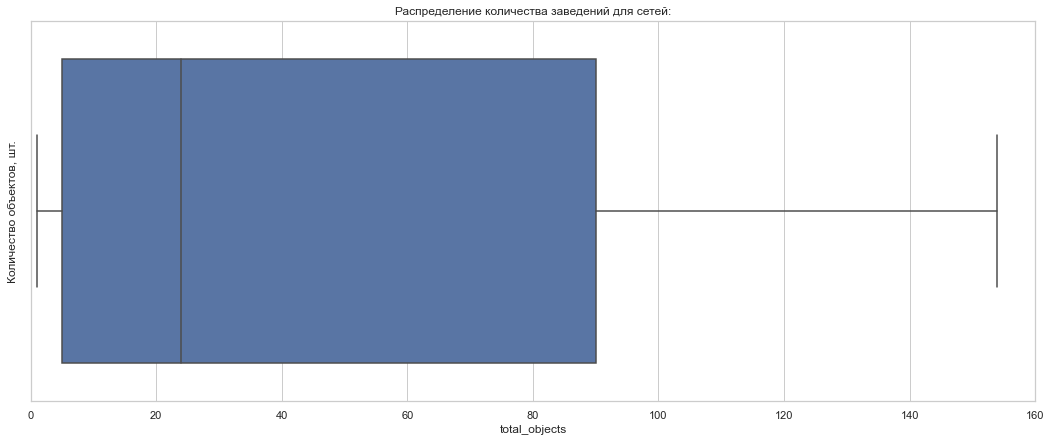

In [10]:
# оценим распределение количества сетевых заведений
plt.title('Распределение количества заведений для сетей:')
plt.xlabel('Заведения')
plt.ylabel('Количество объектов, шт.')
sns.set_style('whitegrid')
sns.boxplot(x=data.query('total_objects>0')['total_objects']).set(xlim=(0, 160))
plt.show()

По графику делаем вывод, что в качестве маркера большого количества заведений в сети следует взять значение второго квартиля, равного 24.

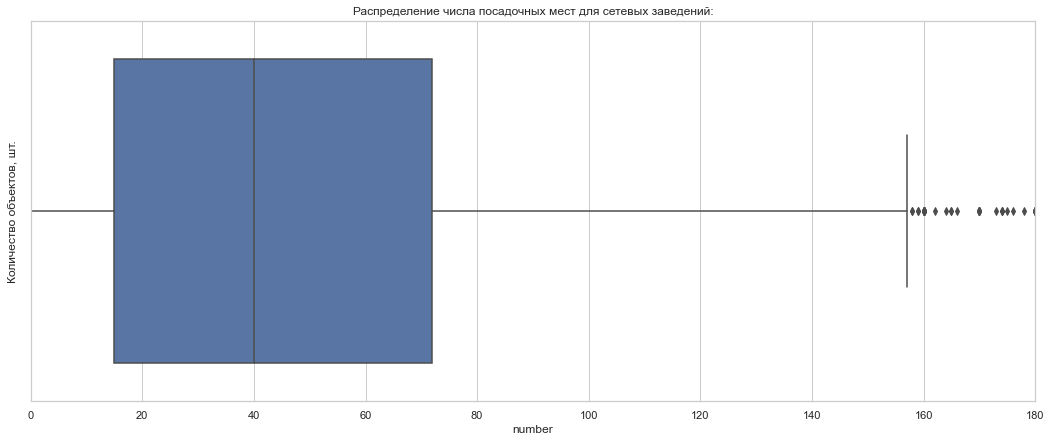

In [11]:
# оценим распределение числа посадочных мест для сетевых заведений
plt.title('Распределение числа посадочных мест для сетевых заведений:')
plt.ylabel('Количество объектов, шт.')
sns.set_style('whitegrid')
sns.boxplot(x=data.query('chain=="да"')['number']).set(xlim=(0, 180))
plt.show()

По графику делаем вывод, что в качестве маркера большого числа посадочных мест следует взять значение второго квартиля, равного 40.

Создадим функцию 'define_category', которая разобьет данные на 4 категории:
- Категория D: мало мест и мало заведений 
- Категория C: много мест и мало заведений
- Категория B: мало мест и много заведений
- Категория A: много мест и много заведений

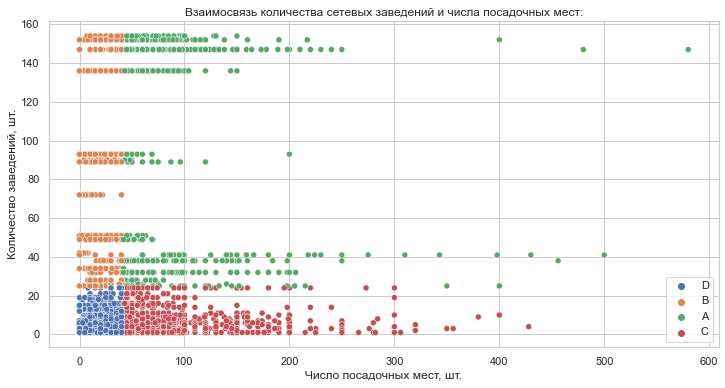

In [12]:
def define_category(df):
    # маркер по количеству посадочных мест: "много"/"мало"
    number_limit = 40
    # маркер по количеству объектов: "много"/"мало"
    objects_limit = 24
    
    if df['total_objects']==0:
        return 0
    if df['number']<=number_limit and df['total_objects']<=objects_limit:
        return 'D'
    elif df['number']>number_limit and df['total_objects']<=objects_limit:
        return 'C'
    elif df['number']<=number_limit and df['total_objects']>objects_limit:
        return 'B'
    else:
        return 'A'
    
data['category'] = data.apply(define_category, axis=1)

# сводная таблица с количеством объектов для каждой категории 
tmp = data.query('chain=="да"').pivot_table(index='category', values='id', aggfunc=['count']).reset_index()
tmp.columns = ['category', 'count']
# доля каждого вида от общего количества
tmp['ratio'] = tmp['count'] / tmp['count'].sum()

legend = (['А: много заведений и много мест', 
           'B: много заведений и мало мест', 
           'C: мало заведений и много мест',
           'D: мало заведений и мало мест'])

# проанализируем взаимосвязь количества сетевых заведений от числа посадочных мест
sns.set(rc={'figure.figsize':(12, 6)})
sns.set_style('ticks')
sns.set_style('whitegrid')
sns.scatterplot(data=data.query('total_objects>0'), x='number', y='total_objects', hue='category')
plt.title('Взаимосвязь количества сетевых заведений и числа посадочных мест:')
plt.xlabel('Число посадочных мест, шт.')
plt.ylabel('Количество заведений, шт.')
plt.legend()
plt.show();

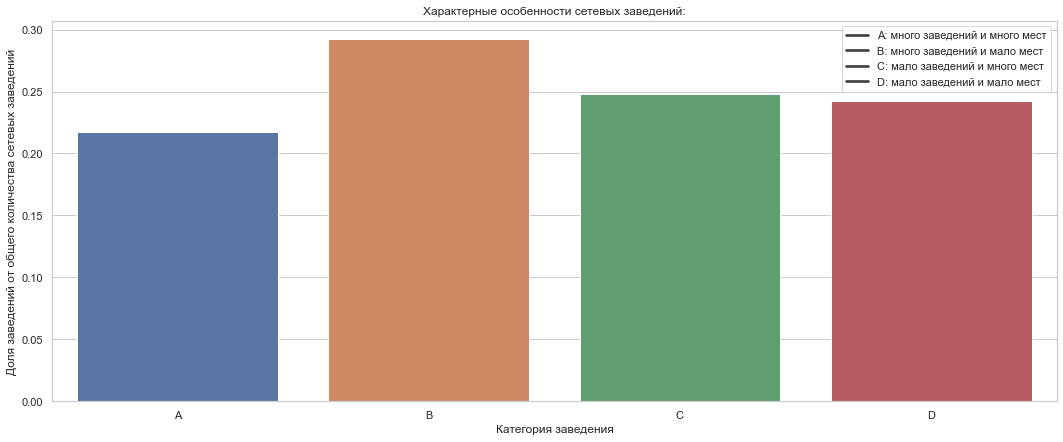

In [13]:
# Гистограмма, отражающая долю заведений каждой катгеории от общего количества сетевых заведений
sns.set(rc={'figure.figsize':(18, 7)})
#sns.set_style('ticks')
sns.set_style('whitegrid')
sns.barplot(x='category', y='ratio', data=tmp)

plt.ylabel('Доля заведений от общего количества сетевых заведений')
plt.xlabel('Категория заведения')
plt.title('Характерные особенности сетевых заведений:')
plt.legend(legend)
plt.show();

Вывод: для сетевых заведений Москвы характерно много заведений с небольшим числом посадочных мест в каждом.

### Cреднее количество посадочных мест для каждого вида объекта общественного питания <a id="average_number"></a> 

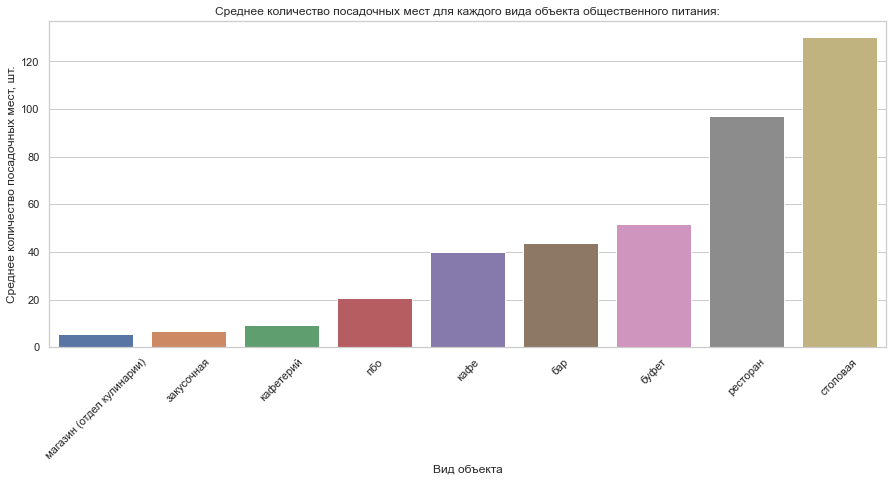

In [14]:
# сводная таблица со средним количеством мест для каждого вида объекта
tmp = data.pivot_table(index='object_type', values='number', aggfunc=['mean']).reset_index()
tmp.columns = ['object_type', 'mean_number']
tmp['object_type'] = tmp['object_type'].str.replace('предприятие быстрого обслуживания','пбо')
tmp = tmp.sort_values(by='mean_number')

sns.set(rc={'figure.figsize':(15, 6)})
#sns.set_style('ticks')
sns.set_style('whitegrid')
sns.barplot(x='object_type', y='mean_number', data=tmp)

plt.ylabel('Среднее количество посадочных мест, шт.')
plt.xlabel('Вид объекта')
plt.title('Cреднее количество посадочных мест для каждого вида объекта общественного питания:')
plt.xticks(rotation = 45)
plt.show();

Вывод: по графику видим, что, в среднем, самое большое количество посадочных мест предоставляют столовые.

### Информация об улице <a id="street_info"></a> 

Выделим в отдельный столбец 'street' информацию об улице из столбца address:

In [15]:
# список с типами улиц
street_types = (['аллея', 'бульвар', 'набережная', 'площадь', 'проезд', 'проспект', 'переулок', 'улица', 'шоссе'])

# функция, возвращающая название улицы из столбца 'address' датафрейма
def define_street(df):
    spl=df['address'].split(', ')
    #print(spl)
    for i in range(0,len(spl)):
        for x in range(0, len(street_types)):
            if(street_types[x] in spl[i]):
                return spl[i]
    return 'unknown'

# выделим в отдельный столбец 'street' информацию об улице при помощи 'define_street', 
data['street'] = data.apply(define_street, axis=1)    
display(data.head(5))

,id,object_name,chain,object_type,address,number,total_objects,category,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,0,0,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,0,0,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,0,0,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,2,D,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,0,0,Абрамцевская улица


### ТОП-10 улиц по количеству объектов общественного питания <a id="top_10"></a> 

В начале воспользуемся внешней информацией и определим, в каких районах Москвы находится каждая улица из датасета. 
Для этого дополним его соответствующей информацией из файла, размещенного на Google Sheets: 

In [16]:
# загрузим данные с улицами и районами Москвы из Google Sheets
spreadsheet_id = "1lt0n6nSSiasH4z-rYzo53y_Gl8_soUPYUuBovfiOti8"

file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
moscow_streets = pd.read_csv(BytesIO(r.content))

# отрбросим лишние столбцы и соберем данные в сводную иаблицу с группировкой по названию улицы
moscow_streets.drop('areaid', axis=1, inplace=True)
moscow_streets = moscow_streets.pivot_table(index='streetname', values=['okrug','area'], aggfunc={lambda x: ', '.join(x)}).reset_index()
moscow_streets.columns = ['street', 'area', 'district']

# добавим для каждого объекта датасета данные об округе и районе, в котором он расположен
data = data.merge(moscow_streets, on=['street'], how='left')
data['area'] = data['area'].str.lower()
data['area'] = data['area'].replace('район ','',regex=True)
data['area'] = data['area'].replace(' район','',regex=True)
data['area'] = data['area'].str.title()
display(data.head(5))

,id,object_name,chain,object_type,address,number,total_objects,category,street,area,district
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,0,0,улица Егора Абакумова,Ярославский,СВАО
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,0,0,улица Талалихина,"Таганский, Нижегородский, Южное Бутово","ЦАО, ЮВАО, ЮЗАО"
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,0,0,Абельмановская улица,Таганский,ЦАО
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,2,D,Абрамцевская улица,Лианозово,СВАО
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,0,0,Абрамцевская улица,Лианозово,СВАО


Найдем ТОП-10 улиц по количеству объектов общественного питания и построим для них график:

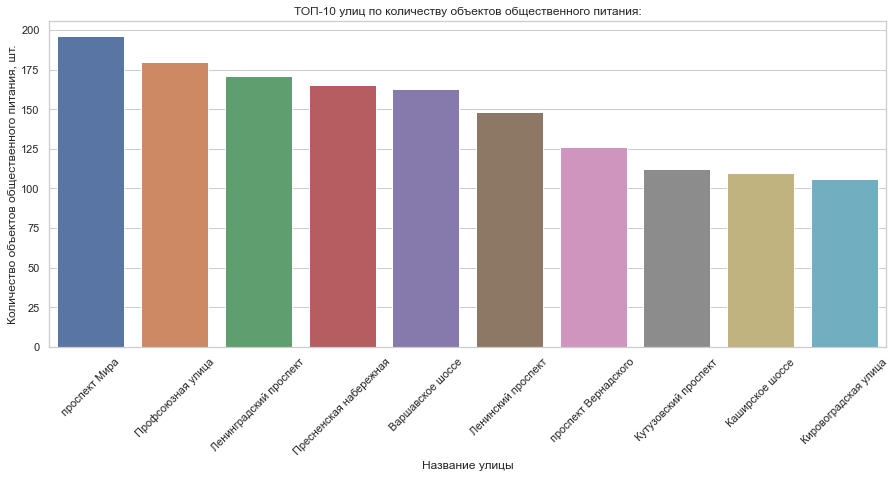

In [17]:
# сводная таблица с количеством объектов на каждой улицы
tmp = data.query('street!="unkwown"').pivot_table(index=['street', 'area'], values='id', aggfunc=['count']).reset_index()
tmp.columns = ['street_name','area', 'total_objects']
tmp = tmp.sort_values(by='total_objects', ascending=False)

sns.set(rc={'figure.figsize':(15, 6)})
#sns.set_style('ticks')
sns.set_style('whitegrid')
sns.barplot(x='street_name', y='total_objects', data=tmp.head(10))

plt.ylabel('Количество объектов общественного питания, шт.')
plt.xlabel('Название улицы')
plt.title('ТОП-10 улиц по количеству объектов общественного питания:')
plt.xticks(rotation = 45)
plt.show();

Теперь посмотрим, в каких районах Москвы находятся эти улицы:

In [18]:
pd.options.display.max_colwidth = 200
print('ТОП-10 улиц по количеству объектов общественного питания:')
display(tmp.head(10))

ТОП-10 улиц по количеству объектов общественного питания:


,street_name,area,total_objects
1351,проспект Мира,"Алексеевский, Ярославский, Марьина Роща, Останкинский, Ростокино, Свиблово, Мещанский",196
968,Профсоюзная улица,"Академический, Черемушки, Ясенево, Коньково, Обручевский, Теплый Стан",180
653,Ленинградский проспект,"Аэропорт, Беговой, Хорошевский, Сокол",171
952,Пресненская набережная,Пресненский,165
373,Варшавское шоссе,"Чертаново Центральное, Чертаново Северное, Чертаново Южное, Донской, Нагатино-Садовники, Нагорный, Северное Бутово, Южное Бутово",163
656,Ленинский проспект,"Проспект Вернадского, Тропарево-Никулино, Донской, Гагаринский, Ломоносовский, Обручевский, Теплый Стан, Якиманка",148
1349,проспект Вернадского,"Проспект Вернадского, Раменки, Тропарево-Никулино, Гагаринский, Ломоносовский",126
644,Кутузовский проспект,"Дорогомилово, Фили-Давыдково",112
569,Каширское шоссе,"Москворечье-Сабурово, Нагатино-Садовники, Орехово-Борисово Южное, Орехово-Борисово Северное",110
576,Кировоградская улица,"Чертаново Центральное, Чертаново Северное, Чертаново Южное",106


###  Число улиц с одним объектом общественного питания <a id="street_number"></a> 

Найдем число улиц с одним объектом общественного питания:

In [19]:
print("Число улиц с одним объектом общественного питания: ", tmp.query('total_objects==1')['street_name'].count())
print("\nРайоны, в которых расположены улицы с одним объектом общественного питания:")
print(tmp.query('total_objects==1')['area'].unique())

Число улиц с одним объектом общественного питания:  506

Районы, в которых расположены улицы с одним объектом общественного питания:
['Мещанский' 'Марьина Роща' 'Кузьминки' 'Тверской' 'Преображенское'
 'Соколиная Гора' 'Лианозово' 'Нижегородский' 'Аэропорт' 'Фили-Давыдково'
 'Басманный, Красносельский' 'Свиблово' 'Покровское-Стрешнево' 'Солнцево'
 'Внуково' 'Рязанский' 'Якиманка' 'Южное Бутово' 'Богородское' 'Таганский'
 'Сокольники' 'Ясенево' 'Хорошево-Мневники' 'Даниловский'
 'Бескудниковский' 'Замоскворечье' 'Аэропорт, Сокол' 'Бутырский'
 'Басманный' 'Тверской, Марьина Роща, Мещанский' 'Печатники' 'Кунцево'
 'Лефортово' 'Тимирязевский' 'Красносельский, Мещанский'
 'Перово, Соколиная Гора' 'Хамовники' 'Люблино' 'Раменки' 'Ростокино'
 'Текстильщики' 'Алексеевский' 'Красносельский' 'Северное Бутово' 'Арбат'
 'Митино' 'Донской' 'Пресненский' 'Войковский' 'Останкинский'
 'Хорошевский, Сокол' 'Хорошевский' 'Щукино' 'Очаково-Матвеевское'
 'Савеловский' 'Косино-Ухтомский' 'Филевский Парк' '

Найдем ТОП-5 районов, в которых сосредоточено больше всего улиц с одним заведением: 

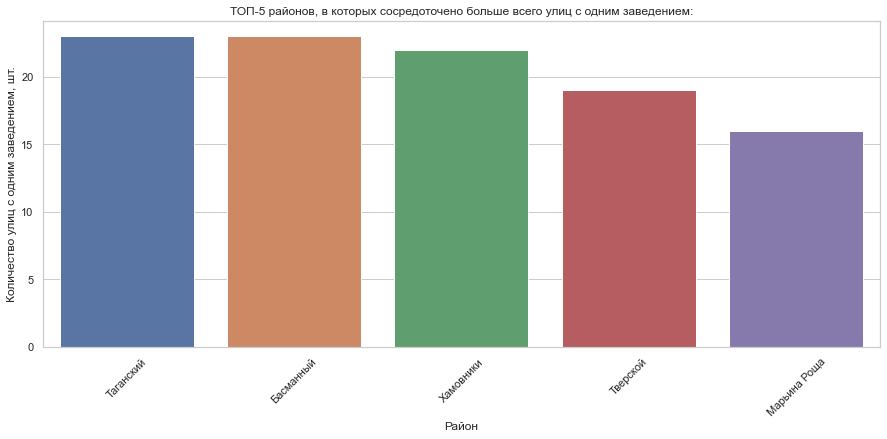

In [20]:
# сводная таблица с количеством объектов на каждой улицы
tmp = tmp.query('total_objects==1').pivot_table(index='area', values='street_name', aggfunc='count').reset_index()
tmp.columns = ['area', 'total_streets']
tmp = tmp.sort_values(by='total_streets', ascending=False)

sns.set(rc={'figure.figsize':(15, 6)})
#sns.set_style('ticks')
sns.set_style('whitegrid')
sns.barplot(x='area', y='total_streets', data=tmp.head(5))

plt.ylabel('Количество улиц с одним заведением, шт.')
plt.xlabel('Район')
plt.title('ТОП-5 районов, в которых сосредоточено больше всего улиц с одним заведением:')
plt.xticks(rotation = 45)
plt.show();

## Общий вывод <a id="conclusion"></a> 

Для того, чтобы подготовить исследование рынка заведений общественного питания Москвы для инвесторов, мы использовали открытые данные о заведениях общественного питания Москвы.

Данные были проверены на наличие ошибок и оценки их влияния на исследование. Далее была выполнена предобработка данных, которая в себя включала поиск и обработку дубликатов. После этого был проведен исследовательский анализ, включающий в себя оценку объектов общественного питания Москвы по различным метрикам, и получены следующие реузльтаты: 

* Наиболее распространенные виды объектов общественного питания в Москве: "кафе" (39.6%), "столовая" (17.0%), "ресторан" (15.0%);
* Несетевых заведений в Москве в 4 раза больше, чем сетевых: 80.6% против 19.4% от общего количества заведений);
* Сетевое распространение характерно для предприятий быстрого обслуживания;
* Для сетевых заведений Москвы характерно много заведений с небольшим числом посадочных мест в каждом;
* В среднем, самое большое количество посадочных мест предоставляют столовые;
* ТОП-10 улиц по количеству объектов общественного питания (далее - "Список улиц-1"): 
    1. проспект Мира (Алексеевский, Ярославский, Марьина роща, Останкинский, Ростокино, Свиблово, Мещанский район)
    2. Профсоюзная улица (Академический, Черемушки, Ясенево, Коньково, Обручевский, район Теплый Стан) 
    3. Ленинградский проспект (Аэропорт, Беговой, Хорошевский, район Сокол)
    4. Пресненская набережная (Пресненский район) 
    5. Варшавское шоссе (Чертаново Центральное, Чертаново Северное, Чертаново Южное, Донской, Нагатино-Садовники, Нагорный, Северное Бутово, район Южное Бутово) 
    6. Ленинский проспект (ЮЗАО, Ломоносовский район) 
    7. проспект Вернадского (Проспект Вернадского, Раменки, Тропарево-Никулино, Гагаринский, Ломоносовский район) 
    8. Кутузовский проспект (Дорогомилово, район Фили-Давыдково) 
    9. Каширское шоссе (Москворечье-Сабурово, Нагатино-Садовники, Орехово-Борисово Южное, район Орехово-Борисово Северное) 
    10. Кировоградская улица (Чертаново Центральное, Чертаново Северное, район Чертаново Южное)  
* В Москве 506 улиц с одним объектом общественного питания. Районы, в которых расположены данные улицы, доступны в отдельном списке (далее - "Список улиц-2").
    

**Рекомендации о виде заведения, количестве посадочных мест и районе расположения:**

Тип заведений "кафе" имеет широкую распространенность на рынке заведений общественного питания Москвы. Чтобы быть конкурентноспособным и востребованным, кафе должно иметь уникальную особенность, дабы выделяться на общем фоне других заведений. Предлагаемый оригинальный подход к обсуживанию гостей роботами, как раз то, что надо. 

Рекомендуемые характеристики:
* Тип: кафе.
* Количество посадочных мест: до 40 посадочных мест.
* Район расположения: центр.

Возможность развития сети: решение будет приниматься по итогам работы первого заведения в течение пробного периода.

## Презентация <a id="presentation"></a> 

Презентация: <https://drive.google.com/file/d/1GjcGfUxSvKbyVdN1QBkRtAFNjMf8mV5g/view?usp=sharing> 